<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer:
* An input layer is the information that you feed in to a system.  Whatever the data is.  This is what the neural network will use to determine outputs.
### Hidden Layer:
* A hidden layer in a neural network is a layer that is doing some work on the inputs, but cannot be seen or desribed by looking at it.  They are the steps between the input and output of a network.  It uses weights and biases to perform work on the data. The outputs are also determined by a given activation function of the network.
### Output Layer:
* The output layer are the predictions or classification of the data after it has gone through the network. As stated previously, it is helped to be determined by the activation function used in the neural network.
### Neuron:
* A Neuron (or node) in a neural network is the what the basic make-up of the network is. Each input, bias, hidden node, and output is a Neuron in the network.  Things get passed on, again, determined by the activation function through each layer, to determine the final Neurons (outputs).
### Weight:
* A weight is something that is attached to an input of the network.  They are set at the beginnning and adjusted throughout the training period of the network.  Weights essentially determine how influential an input is in determining the ouput.
### Activation Function:
* Have been talknig a lot about activation functions.  Their main function .. tee hee .. is to deal with non-linear data.  It can shrink information down to lower dimensions to then get a number that the network can use to determine the output.  In a classification case, the network uses the number produced by the activation function to determine what class the input is.
### Node Map:
![Neural Network Zoo](http://www.asimovinstitute.org/wp-content/uploads/2016/09/neuralnetworks.png)
### Perceptron:
* A Perceptron is one of the more basic neural networks.  It is typically used to classify binary outputs. It consists of 1 working neuron, that takes information from data (inputs) and tosses it out so that the activation function can determine it's value.

## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### A neural network begins with the inputs. Each input has a corresponding weight that is given to it initially.  The weights can be arbitrary at first.  The inputs are then fed into the neurons that perform work on the data.  The goal for the layers is to adjust the weights in order to minimize the error of predictions from real data. The next step is for the processed data to go through the activation fucntion. Which is a function that is able to deal with multi-dimensional data and allow the network to determine the class it will be in the output.  |

## Write your own perceptron code that can correctly classify a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [1]:
import pandas as pd
import numpy as np

inputs = np.array([
    [0, 0, 1],
    [1, 0, 1],
    [0, 1, 1],
    [1, 1, 1]
])

ground_truth = [[1], [1], [1], [0]]

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx * (1-sx)

weights = 2 * np.random.random((3,1)) - 1

In [2]:
weights

array([[-0.39708544],
       [-0.98368861],
       [ 0.40078636]])

In [3]:
for iteration in range(10000):
    weighted_sum = np.dot(inputs, weights)
    
    activated_outputs = sigmoid(weighted_sum)
    
    error = ground_truth - activated_outputs
    
    adjustments = error * sigmoid_derivative(activated_outputs)
    
    weights += np.dot(inputs.T, adjustments)
    
print("Weights after training: ", weights)
print("Output after training: ", activated_outputs)

Weights after training:  [[-11.84095422]
 [-11.84095422]
 [ 17.81029548]]
Output after training:  [[0.99999998]
 [0.99745034]
 [0.99745034]
 [0.00281068]]


## Implement your own Perceptron Class and use it to classify a binary dataset like: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 
- [Titanic](https://raw.githubusercontent.com/ryanleeallred/datasets/master/titanic.csv)
- [A two-class version of the Iris dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Iris.csv)

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [88]:
import matplotlib.pyplot as plt

diabetes_df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv")

In [92]:
y = diabetes_df['Outcome']
X = diabetes_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
        'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].values

In [93]:
class Perceptron(object):
  def __init__(self, rate = 0.01, niter = 10):
    self.rate = rate
    self.niter = niter

  def fit(self, X, y):
    """Fit training data
    X : Training vectors, X.shape : [#samples, #features]
    y : Target values, y.shape : [#samples]
    """

    # weights
    self.weight = np.zeros(1 + X.shape[1])

    # Number of misclassifications
    self.errors = []  # Number of misclassifications

    for i in range(self.niter):
      err = 0
      for xi, target in zip(X, y):
        delta_w = self.rate * (target - self.predict(xi))
        self.weight[1:] += delta_w * xi
        self.weight[0] += delta_w
        err += int(delta_w != 0.0)
      self.errors.append(err)
    return self

  def net_input(self, X):
    """Calculate net input"""
    return np.dot(X, self.weight[1:]) + self.weight[0]

  def predict(self, X):
    """Return class label after unit step"""
    return np.where(self.net_input(X) >= 0.0, 1, -1)

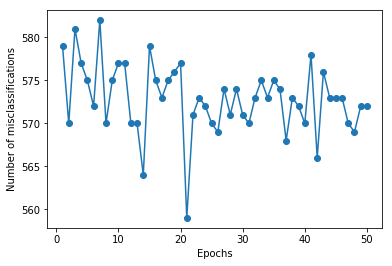

In [98]:
pn = Perceptron(0.1,50)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [100]:
diabetes_df.shape

(768, 9)

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?